In [1]:
import pandas as pd
import numpy as np
import os
import sys
from collections import Counter
import gget
import rapidfuzz
from rapidfuzz.distance.DamerauLevenshtein import distance as rpd
import itertools
import scipy 
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances

import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/sc-iHSC/scanpy/anndata.h5ad"

adata = sc.read(fpath, cache=False)
adata

AnnData object with n_obs × n_vars = 8524 × 19393
    obs: 'n_genes'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand'

In [3]:
barcodes = adata.obs_names
code_dict = {c: i for i, c in enumerate(barcodes)}
n = len(barcodes)
A = np.zeros((n , n))

dists = []

for bc1, bc2 in itertools.combinations(barcodes, 2):

    d = rpd(bc1, bc2)

    i = code_dict[bc1]
    j = code_dict[bc2]

    A[i, j] = d
    A[j, i] = d

    row = {
        'code1' : bc1,
        'code2' : bc2,
        'distance' : d,
    }
    dists.append(row)

A = pd.DataFrame(A, 
                 index=barcodes, 
                 columns=barcodes)

print(f"{A.shape=}")
print('done')

A.shape=(8524, 8524)
done


In [4]:
A.head()

cell_id,AAACCCAAGGTTACCT,AAACCCAAGTTGAAGT,AAACCCAAGTTGTCGT,AAACCCACAGAAGCGT,AAACCCACAGGAGGTT,AAACCCAGTACCTAAC,AAACCCATCAGGACGA,AAACCCATCTTACGGA,AAACGAAAGATACAGT,AAACGAACAGCGAACA,...,TTTGGTTTCGAACCTA,TTTGGTTTCGAGCTGC,TTTGGTTTCTGCTAGA,TTTGTTGAGTGCTCAT,TTTGTTGAGTGTAGTA,TTTGTTGCAAGAGGTC,TTTGTTGCATGTGGTT,TTTGTTGGTATACCCA,TTTGTTGTCACGTAGT,TTTGTTGTCGATGCTA
cell_id,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTTACCT,0.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,...,12.0,14.0,14.0,11.0,11.0,12.0,13.0,11.0,13.0,13.0
AAACCCAAGTTGAAGT,4.0,0.0,2.0,5.0,5.0,7.0,6.0,6.0,5.0,7.0,...,13.0,14.0,13.0,11.0,10.0,12.0,12.0,14.0,12.0,12.0
AAACCCAAGTTGTCGT,4.0,2.0,0.0,4.0,5.0,7.0,6.0,6.0,6.0,9.0,...,14.0,13.0,13.0,10.0,10.0,11.0,11.0,13.0,12.0,12.0
AAACCCACAGAAGCGT,6.0,5.0,4.0,0.0,3.0,8.0,4.0,6.0,6.0,7.0,...,12.0,12.0,14.0,13.0,13.0,10.0,12.0,14.0,12.0,12.0
AAACCCACAGGAGGTT,6.0,5.0,5.0,3.0,0.0,8.0,4.0,7.0,8.0,7.0,...,13.0,13.0,14.0,13.0,12.0,9.0,9.0,15.0,12.0,13.0


In [6]:
dist = pd.DataFrame(dists)
dist.shape

(36325026, 3)

<AxesSubplot: xlabel='distance', ylabel='Count'>

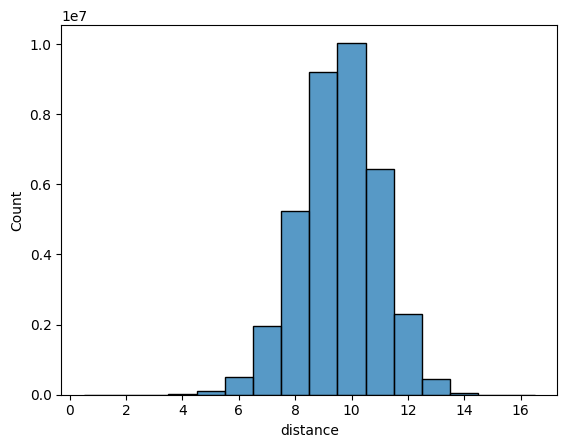

In [11]:
sns.histplot(data=dist,
             x='distance',
             discrete=True)

In [13]:
dist[dist['distance'] < 2].shape

(28, 3)

In [5]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)